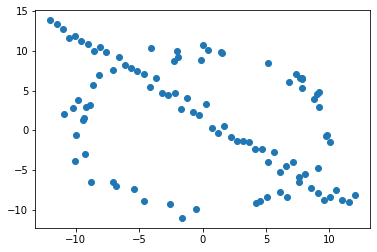

In [4]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt

np.random.seed(45)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)

n = s*np.random.randn(half_n)
t_ = 1.96*1

x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n ,1)))
X = np.vstack((X_circ, X_line))

plt.scatter(X[..., 0], X[..., 1] )

# plt.scatter(X_line, X)

# print(X_circ)
# print(X_line)
# print(X)
plt.show()

58.80042164110046
50


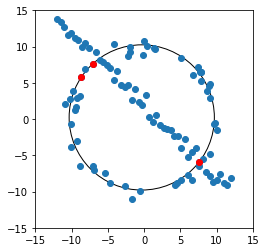

In [23]:
def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)

p = 0.8
e = 0.7
s = 3
N = np.log10(1-p)/np.log10(1-(1-e)**s)
print(N)
max_k = 0

for i in range(int(N)):
    ind1 = np.random.randint(0, 2*half_n)
    ind2 = np.random.randint(0, 2*half_n)
    ind3 = np.random.randint(0, 2*half_n)
    c1 = [X[..., 0][ind1], X[..., 1][ind1]]
    c2 = [X[..., 0][ind2], X[..., 1][ind2]]
    c3 = [X[..., 0][ind3], X[..., 1][ind3]]
    # print(c1, c2, c3)
    
    cen, rad = define_circle(c1, c2, c3)
    k = 0

    for i in range(half_n):
        a, b = X[..., 0][i], X[..., 1][i]
        if cen is None: continue
        dis2 = np.sqrt((a-cen[0])**2 + (b - cen[1])**2)
        r = rad
        
        # print(dis2, r)
        if r-t_ < dis2 < r + t_:
            k+=1
    # print(k)
    # break
    if max_k < k:
        max_k = k
        f_c1, f_c2, f_c3 = c1, c2, c3
        f_cen, f_rad = cen, rad
    if k > 50*(1-e):
        break
    # break

print(max_k)
circle=plt.Circle(f_cen,f_rad, fill = False)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_aspect('equal')
plt.scatter(X[..., 0], X[..., 1] )
plt.scatter(np.array((f_c1, f_c2, f_c3))[..., 0], np.array((f_c1, f_c2, f_c3))[..., 1], color = 'r')
plt.show()

In [25]:
import cv2 as cv
# Create point matrix get coordinates of mouse click on image
point_matrix = np.zeros((2,2),np.int)
counter = 0
def mousePoints(event,x,y,flags,params):
    global counter
    # Left button click
    if event == cv.EVENT_LBUTTONDOWN:
        point_matrix[counter] = x,y
        counter = counter + 1

C:\Users\traja\AppData\Local\Temp\ipykernel_3724\1362476941.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point_matrix = np.zeros((2,2),np.int)


[[528, 281]]
[[528, 281], [528, 529]]
[[528, 281], [528, 529], [926, 539]]
[[528, 281], [528, 529], [926, 539], [932, 197]]
[[ 2.94360959e-03  1.53685916e-01  5.28000000e+02]
 [ 1.29479797e-01 -1.43967855e-01  2.81000000e+02]
 [ 5.57501816e-06 -2.86638860e-04  1.00000000e+00]]


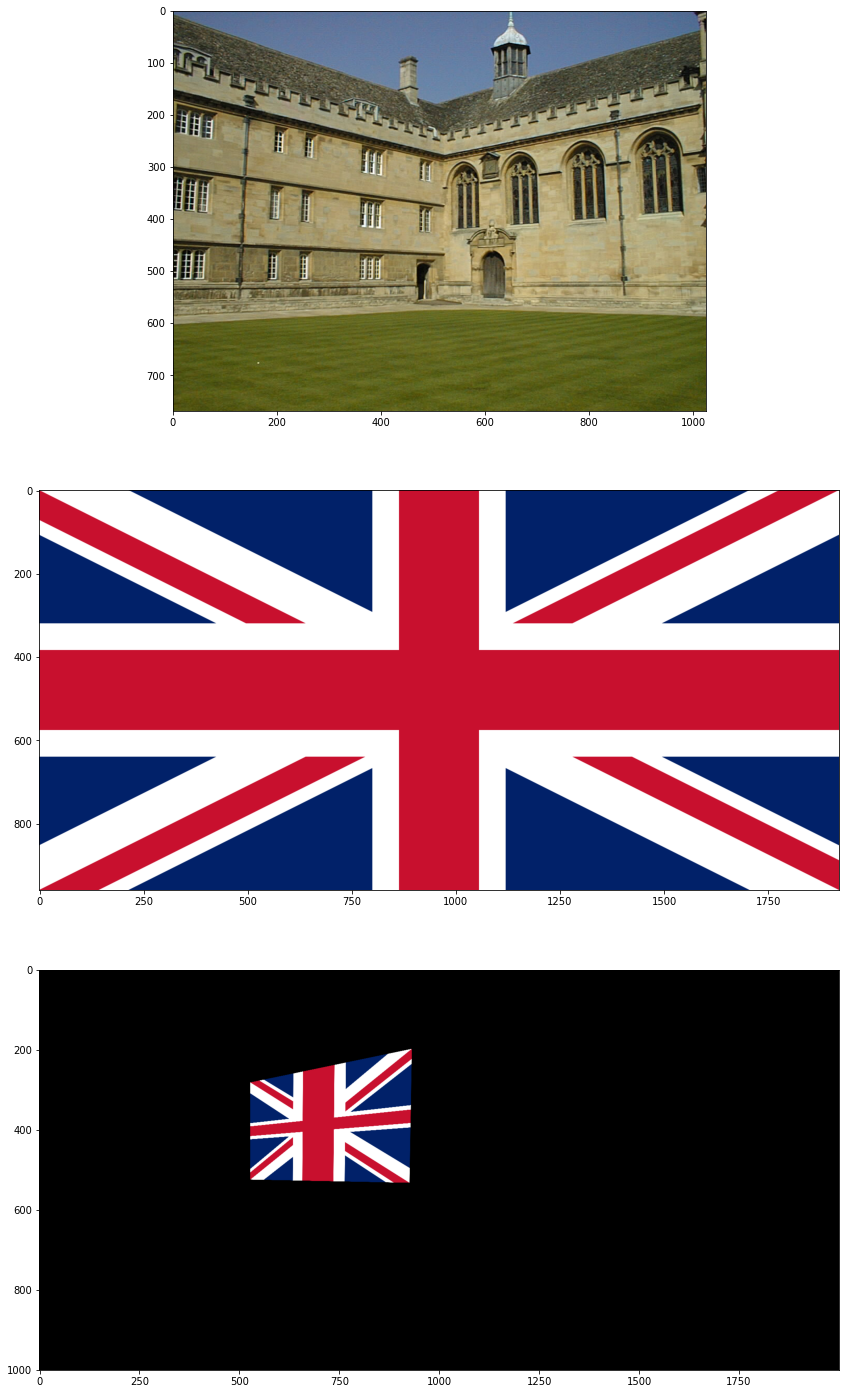

In [10]:
import cv2 as cv

dst_cordinate = [] 
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    # checking for left mouse clicks
    if event == cv.EVENT_LBUTTONDOWN:
        # displaying the coordinates
        # on the Shell 
        dst_cordinate.append([x,y])
        print(dst_cordinate)
        if len(dst_cordinate) == 4: cv.destroyAllWindows()

 
        # displaying the coordinates
        # on the image window
        # font = cv.FONT_HERSHEY_SIMPLEX
        # cv.putText(img, str(x) + ',' +
        #             str(y), (x,y), font,
        #             1, (255, 0, 0), 2)
        # cv.imshow('image', img)
 
    # checking for right mouse clicks    
    # if event==cv.EVENT_RBUTTONDOWN:
 
    #     # displaying the coordinates
    #     # on the Shell
    #     print(x, ' ', y)
 
    #     # displaying the coordinates
    #     # on the image window
    #     font = cv.FONT_HERSHEY_SIMPLEX
    #     b = img[y, x, 0]
    #     g = img[y, x, 1]
    #     r = img[y, x, 2]
    #     cv.putText(img, str(b) + ',' +
    #                 str(g) + ',' + str(r),
    #                 (x,y), font, 1,
    #                 (255, 255, 0), 2)
    #     cv.imshow('image', img)
 
# driver function
# if __name__=="__main__":
 

img = cv.imread('image/001.jpg', 1)
assert img is not None
 

cv.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
cv.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
cv.waitKey(0)
 
    # close the window
cv.destroyAllWindows()


src_cordinate = [[0, 0], [1960, 0], [1960, 960], [0, 960]]
H, status = cv.findHomography(np.array(src_cordinate), np.array(dst_cordinate))
print(H)
im4 = cv.imread('image/Flag_of_the_United_Kingdom.svg.png')
assert im4 is not None

im1to4 = cv.warpPerspective(im4, H, (2000, 2000))

im1= cv.cvtColor(img, cv.COLOR_BGR2RGB)
im4= cv.cvtColor(im4, cv.COLOR_BGR2RGB)
im1to4= cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(3, 1, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im4)
ax[2].imshow(im1to4)
ax[2].set_ylim([1000, 0])
ax[2].set_aspect('equal')

plt.show()